# Project management

## Library Imports

In [1]:
from spectrochempy import *
import os

SpectroChemPy's API - v.0.1a5.dev5+g9796de3f.d20190111
© Copyright 2014-2019 - A.Travert & C.Fernandez @ LCS


## Project creation
We can easily create a new project to store various datasets

In [2]:
proj = Project()

As we did not specify a name, a name has been attributed automatically : 

In [3]:
proj.name

'Project-a8080b4a'

------
To get the signature of the object, one can use the usual '?'

In [4]:
Project?

----
Let's change this name

In [5]:
proj.name = 'myNMRdata'
proj

Now we will add a dataset to the project.

First we read the dataset (here some NMR data) and we give it some name (e.g. 'nmr n°1')

In [6]:
path = os.path.join(datadir.path, 'nmrdata','bruker', 'tests', 'nmr','bruker_1d')
nd1 = NDDataset(name = 'NMR_1D').read_bruker_nmr(path, expno=1, remove_digital_filter=True)
path = os.path.join(datadir.path, 'nmrdata','bruker', 'tests', 'nmr','bruker_2d')
nd2 = NDDataset(name = 'NMR_2D').read_bruker_nmr(path, expno=1, remove_digital_filter=True)

To add it to the project, we use the `add_dataset` function for a single dataset:

In [7]:
proj.add_datasets(nd1)

or `add_datasets` for several datasets. 

In [8]:
proj.add_datasets(nd1, nd2)

Display its structure

In [9]:
proj   

It is also possible to add other projects as sub-project (using the `add_project`)

## Remove an element from a project

In [10]:
proj.remove_dataset('NMR_1D')
proj

## Get project's elements

In [11]:
proj.add_datasets(nd1, nd2)
proj

We can just use the name of the element as a project attribute.

In [12]:
proj.NMR_1D

NDDataset: [-1037.267-1077.841j, -2200.383-2283.510j, ...,    0.062-0.234j,   -0.053+0.101j] unitless

<IPython.core.display.Javascript object>


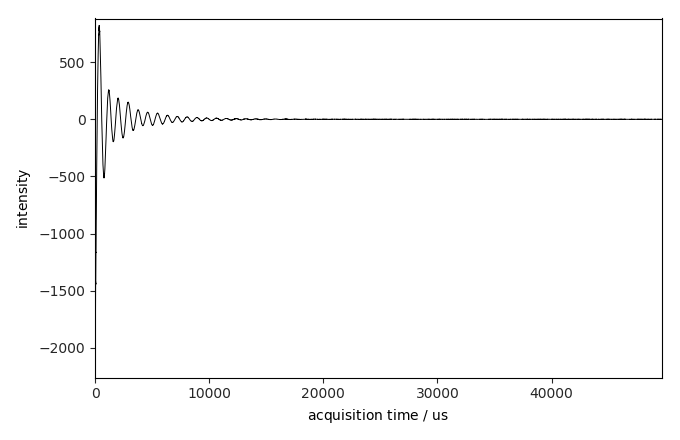

In [13]:
_ = proj.NMR_1D.plot()

However this work only if the name contains no space, dot, comma, colon, etc. The only special character allowed is the underscore `_`.  If the name is not respecting this, then it is possible to use the following syntax (as a project behave as a dictionary). For example:

In [14]:
proj['NMR_1D'].data

array([-1037.267-1077.841j, -2200.383-2283.510j, ...,    0.062-0.234j,   -0.053+0.101j])

## Saving and loading projects

In [15]:
proj

#### Saving

In [16]:
proj.save('NMR')

#### Loading

In [17]:
proj2 = Project.load('NMR')

In [18]:
proj2

In [19]:
proj2.NMR_2D

NDDataset: [[(   0.062+0.224j,   -0.003+0.162j), (   0.147+0.198j,   -0.002+0.056j), ..., (   0.046+0.166j,    0.021-0.027j),
             (   0.031-0.033j,   -0.081+0.011j)],
            [(  -0.060+0.007j,   -0.057-0.134j), (  -0.088-0.028j,    0.117+0.007j), ..., (  -0.051+0.029j,    0.058+0.082j),
             (  -0.060+0.067j,   -0.003-0.005j)],
            ...,
            [(   0.000-0.000j,    0.000-0.000j), (   0.000-0.000j,    0.000-0.000j), ..., (   0.000-0.000j,    0.000-0.000j),
             (   0.000-0.000j,    0.000-0.000j)],
            [(   0.000-0.000j,    0.000-0.000j), (   0.000-0.000j,    0.000-0.000j), ..., (   0.000-0.000j,    0.000-0.000j),
             (   0.000-0.000j,    0.000-0.000j)]] unitless